# CE597 - Mapping Projection and Geometric Geodesy

## Lab 06 - Normal vs. Transverse Mapping Prescription

*Kevan Tissue*  
*Geomatics Engineering*  
*Lyles School of Civil Engineering*  
*Purdue University*

________

In Lab 3, 4, and 5, we employed mappings in the so-called normal aspect. In this lab, we will plot again the three mappings in the transverse aspect by making the meridian that goes through our PoB, a new equator, in the transverse system.

# <span style="color:blue">*PART 1 - Normal Aspect*<span>

In Part 1 of this assignment, I have provided the spherical coordinates of my PoB in DMS format. In addition, I have also plotted 3 maps consisting of the grid lines, coast lines, and my place of birth (PoB) using the normal aspect. The mapping prescriptions used for this part of the assignment were Plate Carree (PC), Sanson-Flamsteed (SF), and Mercator (MC). When mapping this data using the Mercator mapping prescription, I limited the points to only include those that fell between -80° and 80° latitude.

**Importing the necessary packages**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot figures inside the notebook
%matplotlib inline

**Formula for conversing to radians**

In [2]:
rad = math.pi/180
deg = 180/math.pi

**Earth's Radius**  
*(Assuming that the Earth is sphere and the radius of the Earth is 6371 km)*

In [3]:
R = 6371000 # meters

**Function for converting DMS to Decimal Degrees**

In [4]:
def dms2dd(dd, mm, ss):
    """
    A function that will convert degree minute second (DMS) format into decimal degree format
    
    Inputs
    -----
    dd: spherical coordinate value: degrees (integer)
    mm:spherical coordinate value: minutes (integer)
    ss: spherical coordinate value: seconds (floating number)
    
    Output
    ------
    calculated decimal degree value (floating number)
    """
    return dd + mm/60 + ss/3600

## Spherical Coordinates (DMS format)

**Reading in the *pickle* file**

In [5]:
sph_dms = pd.read_pickle("./sph_dms.pkl")

**Printing the Spherical Coordinates in DMS**

In [6]:
pob = sph_dms.loc[[2]]

In [7]:
print()
print("PoB in Spherical Coordinates (DMS)")
print()
print("-----------------------------------------------------------------------------------------------")
print("         Name            \u03BB(deg)   \u03BB(min)    \u03BB(sec)      \u03C8(deg)   \u03C8(min)   \u03C8(sec)        h(m)")
print("-----------------------------------------------------------------------------------------------")
for index, row in pob.iterrows():
    print("%20s %8d %8d %12.5f %8d %8d %12.5f %10.3f" % (row['Name'], row['$\lambda$dd'], 
                                                     row['$\lambda$mm'], row['$\lambda$ss.sssss'],
                                                     row['$\psi$dd'], row['$\psi$mm'], 
                                                     row['$\psi$ss.sssss'], row['$h$ (m)']))
print("-----------------------------------------------------------------------------------------------")
print()


PoB in Spherical Coordinates (DMS)

-----------------------------------------------------------------------------------------------
         Name            λ(deg)   λ(min)    λ(sec)      ψ(deg)   ψ(min)   ψ(sec)        h(m)
-----------------------------------------------------------------------------------------------
   New Orleans (PoB)      -89      -57    -12.38369       30        2     36.78024      0.000
-----------------------------------------------------------------------------------------------



**Resetting the Index**

In [8]:
pob = pob.reset_index(drop=True)

**Applying the Conversion from DMS to Decimal Degrees**

In [9]:
for value, row in pob.iterrows():
    lmd_dd = dms2dd(row['$\lambda$dd'], row['$\lambda$mm'], row['$\lambda$ss.sssss'])
    psi_dd = dms2dd(row['$\psi$dd'], row['$\psi$mm'], row['$\psi$ss.sssss'])

**Reading in the coastline file**

In [10]:
coastline = pd.read_csv('coastline.dat', header=None, sep='\s\s+', engine='python', usecols=[1,2], names=["psi","lambda"])
coast_dd = coastline/60

**Reading in the gridline file**

In [11]:
gridline = pd.read_csv('gridline.dat', header=None, sep='\s\s+', engine='python', usecols=[1,2], names=["psi","lambda"])
grid_dd = gridline/60

------

## $\blacktriangleright$ Plate Carree

###### Plotting Plate Carree Map

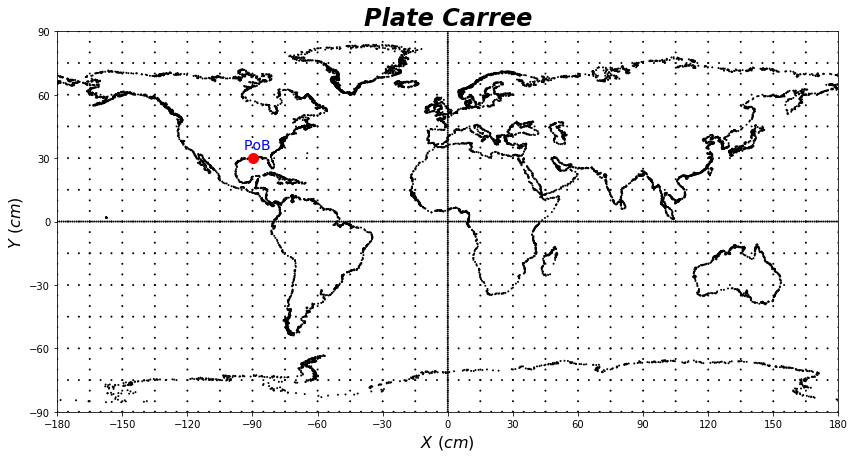

In [12]:
# Plate Carree Mapping Prescription
Xm_PC = lmd_dd
Ym_PC = psi_dd

# Labels for markers
labels_PC = ['  PoB']

# Defining the plot name
PCn = plt

# Resizing the plot window
PCn.rcParams["figure.figsize"] = (14,7)
PCn.rcParams['axes.spines.right'] = True
PCn.rcParams['axes.spines.top'] = True

# Plotting the original locations
PCn.plot(Xm_PC, Ym_PC, 'ro', markersize=10, zorder=4)

# Plotting the coastlines
PCn.scatter(coast_dd['lambda'], coast_dd['psi'], c='k', s=4, edgecolors='none', zorder=2)

# Plotting the gridlines
PCn.scatter(grid_dd['lambda'], grid_dd['psi'], c='k', s=4, edgecolors='none', zorder=3)

# Plot title & Axis labels
PCn.xlabel('$X$ $(cm)$', fontsize='16', fontweight='bold')
PCn.ylabel('$Y$ $(cm)$', fontsize='16', fontweight='bold')
PCn.title('Plate Carree', fontsize='24', fontweight='bold', style='italic')

# Adding labels to the markers
for i, txt in enumerate(labels_PC):
    PCn.annotate(txt, (Xm_PC-8, Ym_PC+4), fontsize='14', color='b')

# Tick Mark Labels
PCn.xticks(np.arange(-180, 181, 30))
PCn.yticks(np.arange(-90, 91, 30))
PCn.ylim(-90,90)
PCn.xlim(-180,180)

# Grid
PCn.grid(True, color='white', zorder=1)

-------

## $\blacktriangleright$ Sanson-Flamsteed

###### Plotting Sanson-Flamsteed Map

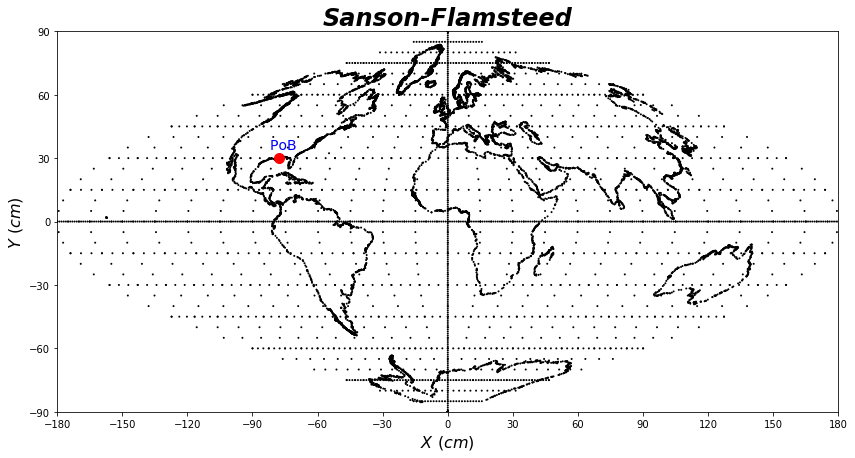

In [13]:
# Sanson-Flamsteed Mapping Prescription
Xm_SF = lmd_dd * np.cos(psi_dd*rad)
Ym_SF = psi_dd

# Labels for markers
labels_SF = ['  PoB']

# Defining the plot name
SFn = plt

# Resizing the plot window
SFn.rcParams["figure.figsize"] = (14,7)
SFn.rcParams['axes.spines.right'] = True
SFn.rcParams['axes.spines.top'] = True

# Plotting the original locations
SFn.plot(Xm_SF, Ym_SF, 'ro', markersize=10, zorder=5) # SF

# Plotting the coastlines
SFn.scatter(coast_dd['lambda']*np.cos(coast_dd['psi']*rad), coast_dd['psi'], c='k', s=4, edgecolors='none', zorder=2)

# Plotting the gridlines
SFn.scatter(grid_dd['lambda']*np.cos(grid_dd['psi']*rad), grid_dd['psi'], c='k', s=4, edgecolors='none', zorder=3)

# Plot title & Axis labels
SFn.xlabel('$X$ $(cm)$', fontsize='16', fontweight='bold')
SFn.ylabel('$Y$ $(cm)$', fontsize='16', fontweight='bold')
SFn.title('Sanson-Flamsteed', fontsize='24', fontweight='bold', style='italic')

# Adding labels to the markers
for i, txt in enumerate(labels_SF):
    SFn.annotate(txt, (Xm_SF-8, Ym_SF+4), fontsize='14', color='b')

# Tick Mark Labels
SFn.xticks(np.arange(-180, 181, 30))
SFn.yticks(np.arange(-90, 91, 30))
SFn.ylim(-90,90)
SFn.xlim(-180,180)

# Grid
SFn.grid(True, color='white', zorder=1)

## $\blacktriangleright$ Mercator

###### Mercator Mapping Function

In [14]:
def mercator(df):
    """
    A function that will take a data frame containing coordinates in decimal degrees
    and apply a mercator mapping prescription to it
    
    Input
    -----
    pandas.DataFrame with columns: psi, lambda (no prescription)
    
    Output
    ------
    pandas.DataFrame with columns: psi, lambda (mercator prescription)
    """
    
    # limiting the latitude to +/- 75 degrees (before mercator)
    df = df[(-80 <= df.psi) & (df.psi <= 81)]
    
    # resetting the data frame index
    df = df.reset_index(drop=True)
    
    # applying the mercator mapping prescription 
    df.psi = np.log(np.tan(((df.psi*rad)/2) + (math.pi/4))) * deg
    
    # limiting the latitude to +/- 75 degrees again (after mercator)
    df = df[(-80 <= df.psi) & (df.psi <= 81)]
    
    # resetting the data frame index
    df = df.reset_index(drop=True)

    return df

###### Plotting Mercator Map

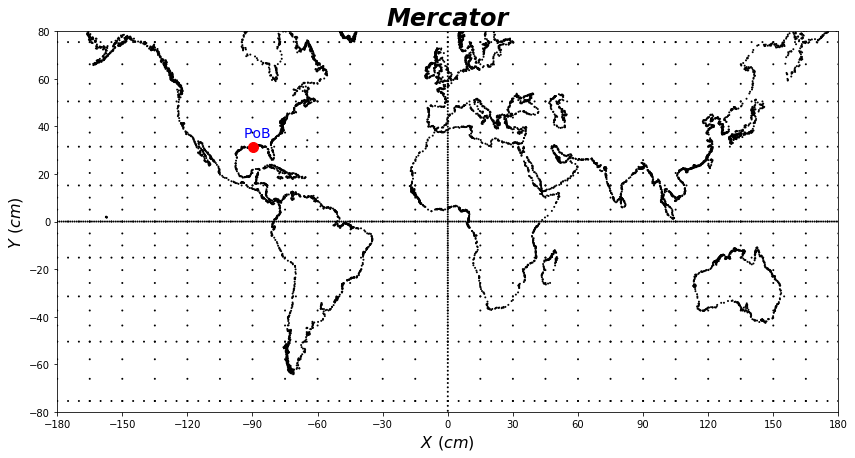

In [15]:
# Putting my PoB coordinates into a data frame
coords_dd = pd.DataFrame(
    {"psi":[psi_dd],
     "lambda":[lmd_dd]
    })

# Applying the Mercator Mapping Prescription to the coordinates
coords_M = mercator(coords_dd)

# Mercator mapping prescription
Xm_M = coords_M['lambda']
Ym_M = coords_M['psi']

# Labels for markers
labels_M = ['  PoB']

# Defining the plot name
MCn = plt

# Resizing the plot window
MCn.rcParams["figure.figsize"] = (14,7)
MCn.rcParams['axes.spines.right'] = True
MCn.rcParams['axes.spines.top'] = True

# Plotting the original locations
MCn.plot(Xm_M, Ym_M, 'ro', markersize=10, zorder=5) # SF

# Applying the Mercator Mapping Prescription to the coastlines
coast_M = mercator(coast_dd)

# Plotting the coastlines
MCn.scatter(coast_M['lambda'], coast_M['psi'], c='k', s=4, edgecolors='none', zorder=2)

# Applying the Mercator Mapping Prescription to the gridlines
grid_M = mercator(grid_dd)

# Plotting the gridlines
MCn.scatter(grid_M['lambda'], grid_M['psi'], c='k', s=4, edgecolors='none', zorder=3)

# Plot title & Axis labels
MCn.xlabel('$X$ $(cm)$', fontsize='16', fontweight='bold')
MCn.ylabel('$Y$ $(cm)$', fontsize='16', fontweight='bold')
MCn.title('Mercator', fontsize='24', fontweight='bold', style='italic')

# Adding labels to the markers
MCn.annotate(txt, (Xm_M-8, Ym_M+4), fontsize='14', color='b')

# Tick Mark Labels
MCn.xticks(np.arange(-180, 181, 30))
MCn.yticks(np.arange(-80, 81, 20))
MCn.ylim(-80,80)
MCn.xlim(-180,180)

# Grid
MCn.grid(True, color='white', zorder=1)

______

# <span style="color:blue">*PART 2 - Making PoB Meridian the New Equator*<span>

In normal aspect mapping with PC, SF, and MC, the scale ratio is much better near the equator than near the poles. If your area of interest is closer to the poles, however, the scale ratio can be dramatically improved by mapping in the transverse aspect instead. When mapping in transverse aspect, we are essentially defining a meridian of our choosing as the new equator by applying a series of rotations to coordinates, thus giving our area of interest a much better scale ratio. 

To make my PoB meridian the new equator, I needed to rotate the coordinate system. Since I will also be needing to do this with the coast lines and grid lines, I've created several functions to help simplify the process. These functions are provided below.

Starting with the coordinates of my PoB in the spherical coordinate system, I converted them from spherical to cartesian using the function "sph2xyz". This function takes values for longitude, latitude, and height and applies a coordinate transformation matrix based on the radius of the earth. It then outputs the coordinates in cartesian format. Now that I have cartesian coordinates, I need to apply the rotation. To make my PoB meridian the new equator, I will rotate +90 degrees about the x-axis and then +lambda about the y-axis, where lambda is the longitudinal angle of my PoB. These two rotations will set my psi equal to zero, so there is no need to apply a rotation about the z-axis. To apply the rotations, I created the function "rotate", as seen below. This function takes the cartesian coordinates (x, y, z) and the specified rotation angles (omega, phi, kappa) as inputs. It then does matrix multiplication and outputs the newly rotated cartesian coordinates (x, y, z). In order to map these coordinates now, I need to convert them from cartesian back to spherical, so to do this, I use the function "xyz2sph" shown below. This function takes cartesian coordinates (x, y, z) and applies a coordinate transformation to them. It then outputs the coordinates in spherical form (lambda, psi, height). Now the coordinates are ready to mapped.

To help simplify this process even more, I created a function called "transverse". This function takes a data frame of spherical coordinates, as well as the rotation angles (omega, phi, kappa) as inputs. It then applies the coordinate trasformation and rotation functions mentioned above.

## $\blacktriangleright$ Functions

**Spherical $\rightarrow$ Cartesian**

In [16]:
def sph2xyz(l,p,h, R = 6371000):
    """
    Function that converts geocentric earth-fixed spherical coordinates 
    into geocentric earth-fixed cartesian coordinates
    
    Input
    -----
    l: lambda, longitude (units: radians)
    p: psi, latitude (units: radians)
    h: height above sphere (units: meters)
    
    Output
    ------
    x,y,z: cartesian coordinates (units: meters)
    """
    x = (R+h) * np.cos(p) * np.cos(l)
    y = (R+h) * np.cos(p) * np.sin(l)
    z = (R+h) * np.sin(p)
    
    return x,y,z

**Cartesian $\rightarrow$ Spherical**

In [17]:
def xyz2sph(x,y,z, R = 6371000):
    """
    Function that converts geocentric earth-fixed cartesian coordinates into 
    geocentric earth-fixed spherical coordinates
    
    Input
    -----
    x,y,z: cartesian coordinates (units: meters)
    
    Output
    ------
    lmd: longitude (units: radians)
    psi: latitude (units: radians)
    h: height above sphere (units: meters)
    """
    lmd = np.arctan2(y, x) * deg
    psi = np.arctan2(z, math.sqrt(x**2 + y**2)) * deg
    h = math.sqrt(x**2 + y**2 + z**2) - R
    
    return lmd, psi, h

**Rotation Matrix**

In [18]:
def rotate(x, y, z, omega, phi, kappa):
    """
    Function that applies a 3D rotation to geocentric earth-fixed cartesian coordinates 
    
    Input
    -----
    x,y,z: cartesian coordinates (units: meters)
    omega: angle of rotation with respect to the x-axis (units: decimal degrees)
    phi:   angle of rotation with respect to the y-axis (units: decimal degrees)
    kappa: angle of rotation with respect to the z-axis (units: decimal degrees)
    
    Output
    ------
    x,y,z: rotated cartesian coordinates (units: meters)
    """
    # Initializing Variables
    xp = np.zeros(x.shape[0])
    yp = np.zeros(y.shape[0])
    zp = np.zeros(z.shape[0])
    
    # Converting the angles from decimal degrees to radians
    ax = omega * rad
    ay = phi * rad
    az = kappa * rad
    
    # Rotation matrices for each axis
    Rx = [[1, 0, 0],
         [0, np.cos(ax), np.sin(ax)],
         [0, -np.sin(ax), np.cos(ax)]]
    
    Ry = [[np.cos(ay), 0, -np.sin(ay)],
         [0, 1, 0],
         [np.sin(ay), 0, np.cos(ay)]]
    
    Rz = [[np.cos(az), np.sin(az), 0],
         [-np.sin(az), np.cos(az), 0],
         [0, 0, 1]]
    
    # Combining the rotation matrices for each axis into a single, 3D rotation matrix
    Mxy = np.matmul(Ry,Rx)
    M = np.matmul(Rz,Mxy)
    
    # Applying rotation to cartesian coordinates (iteratively)
    for index in range(x.shape[0]):
        xp[index], yp[index], zp[index] = np.matmul(M,[x[index], y[index], z[index]])
 
    # Creating a pandas data frame of the rotated cartesian coordinates
    rotated_xyz = pd.DataFrame({
        'x': xp,
        'y': yp,
        'z': zp
    })
    
    return rotated_xyz

## $\blacktriangleright$ Transverse Aspect 

**Transverse Aspect**

In [19]:
def transverse(df_sph, omega, phi, kappa):
    """
    Function that takes a data frame of spherical coordinates in the normal aspect, converts them 
    to cartesian coordinates, applies a 3D rotation, then converts them back to spherical coordinates.
    
    Input
    -----
    df_sph: data frame containing x,y,z cartesian coordinates (units: decimal degrees)
    omega: angle of rotation with respect to the x-axis (units: decimal degrees)
    phi:   angle of rotation with respect to the y-axis (units: decimal degrees)
    kappa: angle of rotation with respect to the z-axis (units: decimal degrees)
    
    Output
    ------
    sph_new: spherical coordinates in transverse aspect (units: decimal degrees)
    """
    # Initializing Variables
    x = np.zeros(len(df_sph), dtype = np.float64)
    y = np.zeros(len(df_sph), dtype = np.float64)
    z = np.zeros(len(df_sph), dtype = np.float64)
    lam = np.zeros(len(df_sph), dtype = np.float64)
    psi = np.zeros(len(df_sph), dtype = np.float64)
    h = np.zeros(len(df_sph), dtype = np.float64)
    
    # Converting coordinates from spherical to cartesian
    for index, row in df_sph.iterrows():
        x[index], y[index], z[index] = sph2xyz(row['lambda']*rad, row['psi']*rad, row['h'])
    
    # Putting cartesian coordinates into a data frame
    xyz = pd.DataFrame({
            'x': x,
            'y': y,
            'z': z
    })

    # Applying rotation to cartesian coordinates
    xyz_new = rotate(xyz['x'], xyz['y'], xyz['z'], omega, phi, kappa) 

    # Converting the rotated coordinates from spherical to cartesian
    for index, row in xyz_new.iterrows():
        lam[index], psi[index], h[index] = xyz2sph(row['x'], row['y'], row['z'])
    
    # Putting rotated spherical coordinates into a data frame
    sph_new = pd.DataFrame({
            'lambda': lam,
            'psi': psi,
            'h': h
    })
    
    return sph_new

###### Transverse Aspect: PoB

In [20]:
# Converting coordinates from spherical to cartesian
for value, row in pob.iterrows():
    x, y, z = sph2xyz(lmd_dd*rad, psi_dd*rad, row['$h$ (m)'])

# Putting cartesian coordinates into a data frame
xyz = pd.DataFrame({
    'x':[x],
    'y':[y],
    'z':[z]
})

# Applying rotation to cartesian coordinates
xyz2 = rotate(xyz['x'], xyz['y'], xyz['z'], 90, lmd_dd, 0)

# Converting the rotated coordinates from spherical to cartesian
for value, row in xyz2.iterrows():
    lmd_ddT, psi_ddT, hT = xyz2sph(row['x'], row['y'], row['z'])

###### Transverse Aspect: Coastlines

In [21]:
# Adding a "height" column of zeros to the coastline data 
coast_dd['h'] = 0

# Applying transverse aspect to coordinates
coast_ddT = transverse(coast_dd, 90, lmd_dd, 0)

###### Transverse Aspect: Gridlines

In [22]:
# Adding a "height" column of zeros to the gridline data 
grid_dd['h'] = 0

# Applying transverse aspect to coordinates
grid_ddT = transverse(grid_dd, 90, lmd_dd, 0)

______

# <span style="color:blue">*PART 3 - Transverse Aspect*<span>

In Part 3 of this assignment, I have plotted the same 3 maps as in Part 1, except this time instead of using normal aspect, I've plotted in transverse aspect. The mapping prescriptions used were the same as in Part 1 (PC, SF, M), except this time I am using the transverse spherical coordinates instead of the normal spherical coordinates. 

**Mapping Prescription Function**

In [23]:
# Setting up argument variables for function
RW = 0
PC = 1
SF = 2
MC = 3
PCt = 4
SFt = 5
MCt = 6

def prescribe(df, prescription):
    """
    Function that applies a mapping prescription to geocentric earth-fixed spherical coordinates in a data frame.
    
    Input
    -----
    dataframe: lambda, psi, height (units: decimal degrees)
    prescription: desired mapping prescription (RW, PC, SF, MC)
    
    Output
    ------
    dataframe: lambda, psi, height (units: decimal degrees)
    """
    
    # Initializing Variables
    lam = np.zeros(len(df), dtype = np.float64)
    psi = np.zeros(len(df), dtype = np.float64)
    h = np.zeros(len(df), dtype = np.float64)
        
    # Applying mapping prescriptions
    for index, row in df.iterrows():
        # Real World
        if prescription == 0:
            lam[index], psi[index], h[index] = [row['lambda'], 
                                                row['psi'], 
                                                row['h']]       
        
        # Plate Carree
        elif prescription == 1:
            lam[index], psi[index], h[index] = [row['lambda'], 
                                                row['psi'], 
                                                row['h']] 
        # Sanson-Flamsteed
        elif prescription == 2:
            lam[index], psi[index], h[index] = [row['lambda']*np.cos(row['psi']*rad), 
                                                row['psi'], 
                                                row['h']]
        # Mercator 
        elif prescription == 3:
            lam[index], psi[index], h[index] = [row['lambda'], 
                                                np.log(np.tan(((row['psi']*rad)/2) + (math.pi/4))) * 180/math.pi,
                                                row['h']]
        # Transverse Plate Carree
        elif prescription == 4:
            lam[index], psi[index], h[index] = [row['lambda'], 
                                                row['psi'], 
                                                row['h']] 
        # Transverse Sanson-Flamsteed
        elif prescription == 5:
            lam[index], psi[index], h[index] = [row['lambda']*np.cos(row['psi']*rad), 
                                                row['psi'], 
                                                row['h']]
        # Transverse Mercator 
        elif prescription == 6:
            lam[index], psi[index], h[index] = [row['lambda'], 
                                                np.log(np.tan(((row['psi']*rad)/2) + (math.pi/4))) * 180/math.pi,
                                                row['h']]

    # Putting new coordinates into a data frame       
    new_coords = pd.DataFrame({
        'lambda':lam,
        'psi':psi,
        'h':h
    })
    
    xA = new_coords['lambda'][0]
    xB = new_coords['lambda'][1]
    xC = new_coords['lambda'][2]
    xD = new_coords['lambda'][3]           
    yA = new_coords['psi'][0]
    yB = new_coords['psi'][1]
    yC = new_coords['psi'][2]
    yD = new_coords['psi'][3]

    return xA,xB,xC,xD,yA,yB,yC,yD

## $\blacktriangleright$ Transverse Plate Carree

###### Plotting Transverse Plate Carree Map

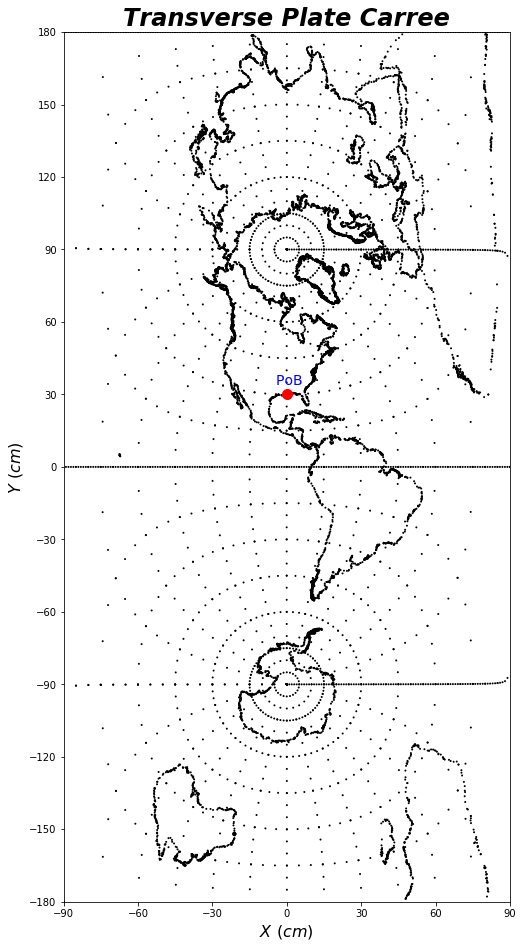

In [24]:
# Transverse Plate Carree Mapping Prescription
XmT_PC = lmd_ddT
YmT_PC = psi_ddT

# Labels for markers
labels_PC = ['  PoB']

# Defining the plot name
PCt = plt

# Resizing the plot window
PCt.rcParams["figure.figsize"] = (8,16)
PCt.rcParams['axes.spines.right'] = True
PCt.rcParams['axes.spines.top'] = True

# Plotting the original locations
PCt.plot(-YmT_PC, XmT_PC, 'ro', markersize=10, zorder=4)

# Plotting the coastlines
PCt.scatter(-coast_ddT['psi'], coast_ddT['lambda'], c='k', s=4, edgecolors='none', zorder=2)

# Plotting the gridlines
PCt.scatter(-grid_ddT['psi'], grid_ddT['lambda'], c='k', s=4, edgecolors='none', zorder=3)

# Plot title & Axis labels
PCt.xlabel('$X$ $(cm)$', fontsize='16', fontweight='bold')
PCt.ylabel('$Y$ $(cm)$', fontsize='16', fontweight='bold')
PCt.title('Transverse Plate Carree', fontsize='24', fontweight='bold', style='italic')

# Adding labels to the markers
for i, txt in enumerate(labels_PC):
    PCt.annotate(txt, (-YmT_PC-8, XmT_PC+4), fontsize='14', color='b')

# Tick Mark Labels
PCt.yticks(np.arange(-180, 181, 30))
PCt.xticks(np.arange(-90, 91, 30))
PCt.xlim(-90,90)
PCt.ylim(-180,180)

# Grid
PCt.grid(True, color='white', zorder=1)

## $\blacktriangleright$ Transverse Sanson-Flamsteed

###### Plotting Transverse Sanson-Flamsteed Map

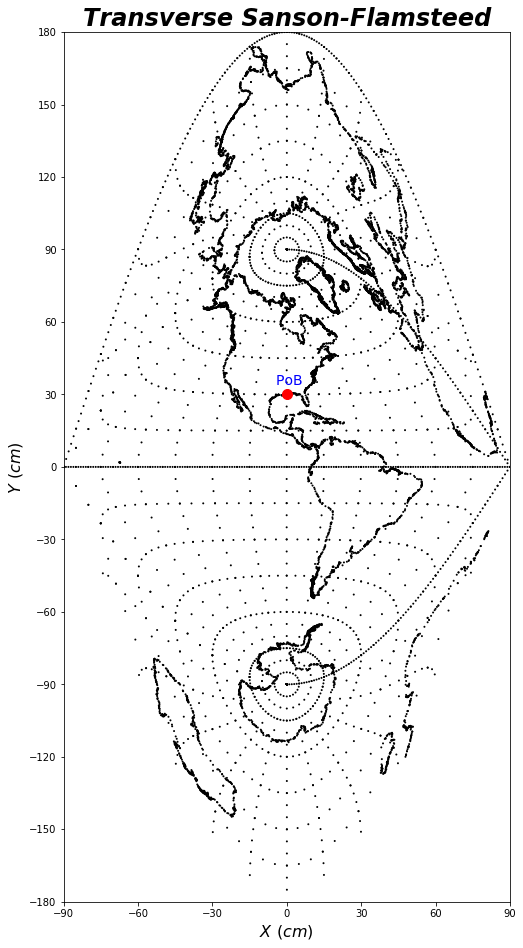

In [25]:
# Transverse Plate Carree Mapping Prescription
XmT_SF = lmd_ddT * np.cos(psi_ddT*rad)
YmT_SF = psi_ddT

# Labels for markers
labels_SF = ['  PoB']

# Defining the plot name
SFt = plt

# Resizing the plot window
SFt.rcParams["figure.figsize"] = (8,16)
SFt.rcParams['axes.spines.right'] = True
SFt.rcParams['axes.spines.top'] = True

# Plotting the original locations
SFt.plot(-YmT_SF, XmT_SF, 'ro', markersize=10, zorder=5) # SF

# Plotting the coastlines
SFt.scatter(-coast_ddT['psi'], coast_ddT['lambda']*np.cos(coast_ddT['psi']*rad), c='k', s=4, edgecolors='none', zorder=2)

# Plotting the gridlines
SFt.scatter(-grid_ddT['psi'], grid_ddT['lambda']*np.cos(grid_ddT['psi']*rad), c='k', s=4, edgecolors='none', zorder=3)

# Plot title & Axis labels
SFt.xlabel('$X$ $(cm)$', fontsize='16', fontweight='bold')
SFt.ylabel('$Y$ $(cm)$', fontsize='16', fontweight='bold')
SFt.title('Transverse Sanson-Flamsteed', fontsize='24', fontweight='bold', style='italic')

# Adding labels to the markers
for i, txt in enumerate(labels_SF):
    SFt.annotate(txt, (-YmT_SF-8, XmT_SF+4), fontsize='14', color='b')

# Tick Mark Labels
SFt.yticks(np.arange(-180, 181, 30))
SFt.xticks(np.arange(-90, 91, 30))
SFt.xlim(-90,90)
SFt.ylim(-180,180)

# Grid
SFt.grid(True, color='white', zorder=1)

## $\blacktriangleright$ Transverse Mercator

###### Plotting Transverse Mercator Map

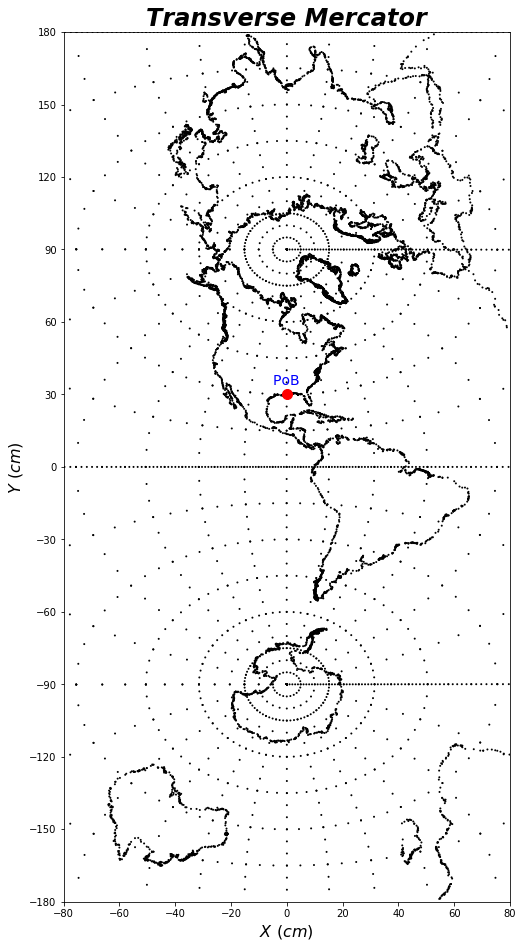

In [26]:
# Putting transverse PoB coordinates into a data frame
coords_ddT = pd.DataFrame(
    {"psi":[psi_ddT],
     "lambda":[lmd_ddT]
    })

# Applying the Mercator Mapping Prescription to the coordinates
coords_MT = mercator(coords_ddT)

# Transverse Mercator Mapping Prescription
XmT_M = coords_MT['lambda']
YmT_M = coords_MT['psi']

# Labels for markers
labels_M = ['  PoB']

# Defining the plot name
MCt = plt

# Resizing the plot window
MCt.rcParams["figure.figsize"] = (8,16)
MCt.rcParams['axes.spines.right'] = True
MCt.rcParams['axes.spines.top'] = True

# Plotting the original locations
MCt.plot(-YmT_M, XmT_M, 'ro', markersize=10, zorder=5) # SF

# Applying the Mercator Mapping Prescription to the coastlines
coast_MT = mercator(coast_ddT)

# Plotting the coastlines
MCt.scatter(-coast_MT['psi'], coast_MT['lambda'], c='k', s=4, edgecolors='none', zorder=2)

# Applying the Mercator Mapping Prescription to the gridlines
grid_MT = mercator(grid_ddT)

# Plotting the gridlines
MCt.scatter(-grid_MT['psi'], grid_MT['lambda'], c='k', s=4, edgecolors='none', zorder=3)

# Plot title & Axis labels
MCt.xlabel('$X$ $(cm)$', fontsize='16', fontweight='bold')
MCt.ylabel('$Y$ $(cm)$', fontsize='16', fontweight='bold')
MCt.title('Transverse Mercator', fontsize='24', fontweight='bold', style='italic')

# Adding labels to the markers
for i, txt in enumerate(labels_M):
    MCt.annotate(txt, (-YmT_M-8, XmT_M+4), fontsize='14', color='b')

# Tick Mark Labels
MCt.yticks(np.arange(-180, 181, 30))
MCt.xticks(np.arange(-80, 81, 20))
MCt.xlim(-80,80)
MCt.ylim(-180,180)

# Grid
MCt.grid(True, color='white', zorder=1)

______

# <span style="color:blue">*PART 4 - Square ABCD & Scale Calculations*<span>

For all of the maps (3 normal and 3 transverse), I've selected a 15°x15° “square” ABCD that contains my PoB. This square is the area between the -95° and -75° meridians and the 30° and 45° parallel circles. Using three lines: EW(AB), NS(AD), NE(AC), I've calculate the real world distances, as well as the respective scales (NS, NE, EW direction) as representative fractions for each of the six maps.

## $\blacktriangleright$ ABCD: Subsetting Data and Applying Transverse Aspect

###### Applying Transverse Aspect to the subset coastlines

In [27]:
# Subsetting the coastlines to only include values within square ABCD
coast_sqr = coast_dd[(coast_dd['lambda'] >= -90) & (coast_dd['lambda'] < -75) &
                       (coast_dd['psi'] >= 30) & (coast_dd['psi'] < 45)]

# Resetting the data frame index
coast_sqr = coast_sqr.reset_index(drop=True)

# Applying transverse aspect to coordinates
coast_sqrT = transverse(coast_sqr, 90, lmd_dd, 0)

###### Applying Transverse Aspect to the subset gridlines

In [28]:
# Subsetting the gridlines to only include values within square ABCD
grid_sqr = grid_dd[(grid_dd['lambda'] >= -90) & (grid_dd['lambda'] < -75) &
                       (grid_dd['psi'] >= 30) & (grid_dd['psi'] < 45)]

# Resetting the data frame index
grid_sqr = grid_sqr.reset_index(drop=True)

# Applying transverse aspect to coordinates
grid_sqrT = transverse(grid_sqr, 90, lmd_dd, 0)

###### Applying Transverse Aspect to the ABCD corner points

In [29]:
# Creating dataset of points that form the 15° x 15° box ABCD
dl = np.array([-90, -75, -75, -90])
dp = np.array([30, 30, 45, 45])
dh = np.array([0, 0, 0, 0])

# Putting spherical coordinates into a data frame
abcd_sph = pd.DataFrame({
    'lambda':dl,
    'psi':dp,
    'h':dh})

# Applying transverse aspect to coordinates
abcdT = transverse(abcd_sph, 90, lmd_dd, 0)

###### Applying Transverse Aspect to the ABCD borderlines

In [30]:
# Creating dataset of points that form the 15° x 15° box ABCD
dBl = np.concatenate((np.arange(-90,-74.9,0.1), np.full(150,-75), 
                      np.arange(-75.1,-90.1,-0.1), np.full(149,-90)), axis=None)
dBp = np.concatenate((np.full(151,30), np.arange(30.1,45.1,0.1), 
                      np.full(150,45), np.arange(44.9,30,-0.1)), axis=None)
dBh = np.full(600,0)

# Putting spherical coordinates into a data frame
abcdB_sph = pd.DataFrame({
    'lambda':dBl,
    'psi':dBp,
    'h':dBh})

# Applying transverse aspect to coordinates
abcdBT = transverse(abcdB_sph, 90, lmd_dd, 0)

## $\blacktriangleright$ Calculating the Scales

**Scale Calculation Function**

In [31]:
# Setting up argument variables for function
RW = 0
PC = 1
SF = 2
MC = 3
PCt = 4
SFt = 5
MCt = 6

def scale(df, prescription):
    """
    Function that calculates the scale of an area specified by coordinates in a given mapping prescription.
    
    Input
    -----
    df: lambda, psi, height (units: decimal degrees)
    prescription: desired mapping prescription (RW, PC, SF, MC)
    
    Output
    ------
    scale: data frame containing scale info for AB, AC, and AD
    """
        # Getting real world spherical coordinates
    xa,xb,xc,xd,ya,yb,yc,yd = prescribe(abcd_sph,0)

    # Square ABCD
    lamA = xa * rad
    psiA = ya * rad
    lamB = xb * rad
    psiB = yb * rad
    lamC = xc * rad
    psiC = yc * rad
    lamD = xd * rad
    psiD = yd * rad

    # RW Distances (in meters)
    ds_AB = R * np.cos(psiA) * (lamB - lamA)
    ds_AC = R * np.arccos((np.sin(psiA)*np.sin(psiC)) + (np.cos(psiA)*np.cos(psiC)*np.cos(lamC - lamA)))
    ds_AD = R * (psiD - psiA)
    dew = df
    drop = prescription
    # Applying mapping prescription to points
    xA,xB,xC,xD,yA,yB,yC,yD = prescribe(dew,drop)

    # MW Distances (in centimeters)
    dS_AB = math.sqrt((xB - xA)**2 + (yB - yA)**2)
    dS_AC = math.sqrt((xC - xA)**2 + (yC - yA)**2)
    dS_AD = math.sqrt((xD - xA)**2 + (yD - yA)**2)
        
    # Scales for each direction
    sigma_AB = ds_AB / (dS_AB/100)
    sigma_AC = ds_AC / (dS_AC/100)
    sigma_AD = ds_AD / (dS_AD/100)        
    
    # Scale Ratio to NS direction
    ratio_NS_AB = sigma_AB / sigma_AD
    ratio_NS_AC = sigma_AC / sigma_AD
    ratio_NS_AD = sigma_AD / sigma_AD
    
    pres = ''
    
    if prescription == 0:
        pres = 'Real World'
    if prescription == 1:
        pres = 'Plate Carree'
    elif prescription == 2:
        pres = 'Sanson-Flamsteed'
    elif prescription == 3:
        pres = 'Mercator'
    elif prescription == 4:
        pres = 'Transverse PC'
    elif prescription == 5:
        pres = 'Transverse SF'
    elif prescription == 5:
        pres = 'Transverse MC'
        
    # Data Frame
    prescript = (pres,pres,pres)
    direction = ('EW','NE','NS')
    RW = (ds_AB, ds_AC, ds_AD)
    MW = (dS_AB, dS_AC, dS_AD)
    sig_ratio = ('1:' + str(int(sigma_AB)), '1:' + str(int(sigma_AC)), '1:' + str(int(sigma_AD)))
    ratio_NS = (ratio_NS_AB, ratio_NS_AC, ratio_NS_AD)

    scale = pd.DataFrame({
        'Prescription':prescript,
        'Direction':direction, 
        'RW (m)':RW, 
        'MW (cm)':MW, 
        'Scale':sig_ratio,
        'Ratio to NS':ratio_NS})
    
    return scale

**Calculating Scale Data**

In [32]:
# Real World
scaleRW = scale(abcd_sph,RW)
scaleRW

# Plate Carree
scalePC = scale(abcd_sph,PC)

# Sanson-Flamsteed
scaleSF = scale(abcd_sph,SF)

# Mercator
scaleMC = scale(abcd_sph,MC)

# Transverse Plate Carree
scalePCt = scale(abcdT,PCt)

# Transverse Sanson-Flamsteed
scaleSFt = scale(abcdT,SFt)

# Transverse Mercator
scaleMCt = scale(abcdT,MCt)

## $\blacktriangleright$ ABCD: Plate Carree

###### Plotting ABCD: Plate Carree Map

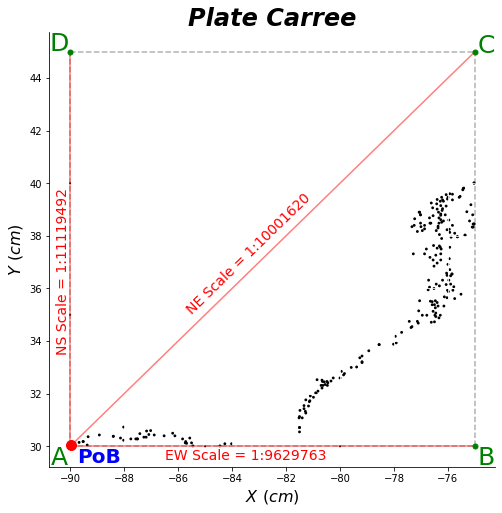

In [33]:
# Plate Carree Mapping Prescription
Xm_PCsqr = lmd_dd # PoB
Ym_PCsqr = psi_dd # PoB

# Applying mapping prescription to points
xA,xB,xC,xD,yA,yB,yC,yD = prescribe(abcd_sph,PC)

# Setting the plot name
PCns = plt

# Plot Window Parameters
PCns.rcParams["figure.figsize"] = (8,8)
PCns.rcParams['axes.spines.right'] = False
PCns.rcParams['axes.spines.top'] = False

# Plotting my Place of Birth (PoB)
PCns.plot(Xm_PCsqr, Ym_PCsqr, 'ro', markersize=10, zorder=4)

# Plotting the coastlines
PCns.scatter(coast_sqr['lambda'], coast_sqr['psi'], c='k', s=8, edgecolors='none', zorder=1)

# Plotting the gridline points
PCns.scatter(grid_sqr['lambda'], grid_sqr['psi'], c='k', s=4, edgecolors='none', zorder=2)

# Plotting the gridlines
PCns.plot([xA,xD],[yA,yD], 'k--', alpha=0.3)
PCns.plot([xB,xC],[yB,yC], 'k--', alpha=0.3)
PCns.plot([xA,xB],[yA,yB], 'k--', alpha=0.3)
PCns.plot([xD,xC],[yD,yC], 'k--', alpha=0.3)

# Plotting Distance Lines
PCns_AD = PCns.plot([xD,xA],[yD,yA],'r-', alpha=0.5)
PCns_AB = PCns.plot([xB,xA],[yB,yA],'r-', alpha=0.5)
PCns_AC = PCns.plot([xC,xA],[yC,yA],'r-', alpha=0.5)

# Plotting corner points
PCns.plot(xA, yA, 'go', markersize=5)
PCns.plot(xB, yB, 'go', markersize=5)
PCns.plot(xC, yC, 'go', markersize=5)
PCns.plot(xD, yD, 'go', markersize=5)

# Plotting the title & axis labels
PCns.xlabel('$X$ $(cm)$', fontsize='16', fontweight='bold')
PCns.ylabel('$Y$ $(cm)$', fontsize='16', fontweight='bold')
PCns.title('Plate Carree', fontsize='24', fontweight='bold', style='italic')

# Plotting Point Labels
PCns.text(Xm_PCsqr+0.2, Ym_PCsqr-0.65, 'PoB', fontsize=20, fontweight='bold', color='b')
PCns.text(xA-0.7, yA-0.7, 'A', fontsize=25, color='g')
PCns.text(xB+0.1, yB-0.7, 'B', fontsize=25, color='g')
PCns.text(xC+0.1, yC-0.05, 'C', fontsize=25, color='g')
PCns.text(xD-0.75, yD+0.05, 'D', fontsize=25, color='g')

# Scale Text Locations
PCns_AD_loc = np.array([((xA+xD)/2)-0.1, ((yA+yD)/2)-4])
PCns_AB_loc = np.array([((xA+xB)/2)-4, ((yA+yB)/2)-0.5])
PCns_AC_loc = np.array([((xA+xC)/2)-3, ((yA+yC)/2)-3.5])
 
# Scale text rotation angle
PCns_AD_rot = PCns.gca().transData.transform_angles(np.array((90,)),PCns_AD_loc.reshape((1, 2)))[0]
PCns_AB_rot = PCns.gca().transData.transform_angles(np.array((0,)),PCns_AB_loc.reshape((1, 2)))[0]
PCns_AC_rot = PCns.gca().transData.transform_angles(np.array((45,)),PCns_AC_loc.reshape((1, 2)))[0]

# Plotting scale text
PCns.text(PCns_AD_loc[0], PCns_AD_loc[1], 'NS Scale = ' + scalePC['Scale'][2], fontsize=14, color='r', 
          rotation=PCns_AD_rot, rotation_mode='anchor')
PCns.text(PCns_AB_loc[0], PCns_AB_loc[1], 'EW Scale = ' + scalePC['Scale'][0], fontsize=14, color='r', 
          rotation=PCns_AB_rot, rotation_mode='anchor')
PCns.text(PCns_AC_loc[0], PCns_AC_loc[1]+1, 'NE Scale = ' + scalePC['Scale'][1], fontsize=14, color='r', 
          rotation=PCns_AC_rot, rotation_mode='anchor')

# Grid
PCns.grid(True, color='white', zorder=3)

## $\blacktriangleright$ ABCD: Sanson-Flamsteed

###### Plotting ABCD: Sanson-Flamsteed Map

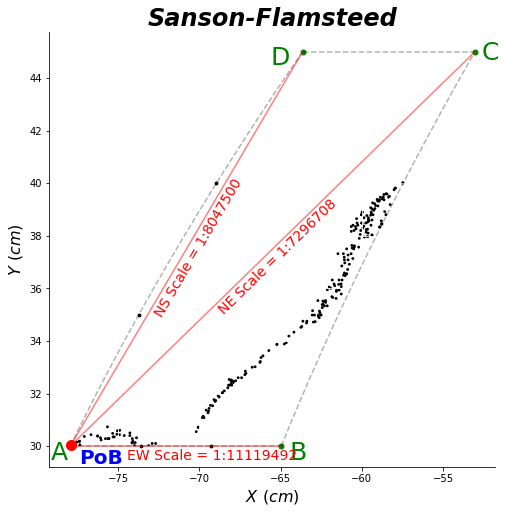

In [34]:
#Sanson-Flamsteed Mapping Prescription
Xm_SFsqr = lmd_dd * np.cos(psi_dd*rad) # PoB
Ym_SFsqr = psi_dd # PoB

# Applying mapping prescription to points
xA,xB,xC,xD,yA,yB,yC,yD = prescribe(abcd_sph,SF)

# Defining the plot name
SFns = plt

# Resizing the plot window
SFns.rcParams["figure.figsize"] = (8,8)
SFns.rcParams['axes.spines.right'] = False
SFns.rcParams['axes.spines.top'] = False

# Plotting PoB
SFns.plot(Xm_SFsqr, Ym_SFsqr, 'ro', markersize=10, zorder=4)

# Plotting the coastlines
SFns.scatter(coast_sqr['lambda']*np.cos(coast_sqr['psi']*rad), coast_sqr['psi'], c='k', s=8, edgecolors='none', zorder=1)

# Plotting the gridlines
SFns.scatter(grid_sqr['lambda']*np.cos(grid_sqr['psi']*rad), grid_sqr['psi'], c='k', s=8, edgecolors='k', zorder=2)

# Plotting corner points
PCns.plot(xA, yA, 'go', markersize=5)
PCns.plot(xB, yB, 'go', markersize=5)
PCns.plot(xC, yC, 'go', markersize=5)
PCns.plot(xD, yD, 'go', markersize=5)

# Defining arrays for plotting gridlines
xAB = np.arange(-90,-75,0.1)
yAB = np.array([30] * 150)
xBC = np.array([-75] * 150)
yBC = np.arange(30,45,0.1)
xCD = np.arange(-90,-75,0.1)
yCD = np.array([45] * 150)
xDA = np.array([-90] * 150)
yDA = np.arange(30,45,0.1)
xAC = np.arange(-90,-75,0.1)
yAC = np.arange(30,45,0.1)

# Applying Sanson-Flamsteed transformation to gridlines
SFxAB = xAB * np.cos(yAB*rad)
SFxBC = xBC * np.cos(yBC*rad)
SFxCD = xCD * np.cos(yCD*rad)
SFxDA = xDA * np.cos(yDA*rad)
SFxAC = xAC * np.cos(yAC*rad)

# Plotting gridlines
SFns.plot(SFxAB,yAB,'k--', alpha=0.3)
SFns.plot(SFxBC,yBC,'k--', alpha=0.3)
SFns.plot(SFxCD,yCD,'k--', alpha=0.3)
SFns.plot(SFxDA,yDA,'k--', alpha=0.3)

# Plotting Distance Lines
SFns.plot([xD,xA],[yD,yA],'r-', alpha=0.5)
SFns.plot([xB,xA],[yB,yA],'r-', alpha=0.5)
SFns.plot([xC,xA],[yC,yA],'r-', alpha=0.5)

# Plot title & Axis labels
SFns.xlabel('$X$ $(cm)$', fontsize='16', fontweight='bold')
SFns.ylabel('$Y$ $(cm)$', fontsize='16', fontweight='bold')
SFns.title('Sanson-Flamsteed', fontsize='24', fontweight='bold', style='italic')

# Labels
SFns.text(Xm_SFsqr+0.5, Ym_SFsqr-0.7, 'PoB', fontsize=20, fontweight='bold', color='b')
SFns.text(xA-1.2, yA-0.5, 'A', fontsize=25, color='g')
SFns.text(xB+0.5, yB-0.5, 'B', fontsize=25, color='g')
SFns.text(xC+0.4, yC-0.3, 'C', fontsize=25, color='g')
SFns.text(xD-2, yD-0.5, 'D', fontsize=25, color='g')

# Scale Text Locations
SFns_AD_loc = np.array([((xA+xD)/2)-1.5, ((yA+yD)/2)-2.6])
SFns_AB_loc = np.array([((xA+xB)/2)-3, ((yA+yB)/2)-0.5])
SFns_AC_loc = np.array([((xA+xC)/2)-3, ((yA+yC)/2)-3.5])
 
# Scale text rotation angle
SFns_AD_theta = math.atan2(yD - yA, xD - xA) * deg
SFns_AB_theta = math.atan2(yB - yA, xB - xA) * deg
SFns_AC_theta = math.atan2(yC - yA, xC - xA) * deg
SFns_AD_rot = SFns.gca().transData.transform_angles(np.array((SFns_AD_theta,)),SFns_AD_loc.reshape((1, 2)))[0]
SFns_AB_rot = SFns.gca().transData.transform_angles(np.array((SFns_AB_theta,)),SFns_AB_loc.reshape((1, 2)))[0]
SFns_AC_rot = SFns.gca().transData.transform_angles(np.array((SFns_AC_theta,)),SFns_AC_loc.reshape((1, 2)))[0]

# Plotting scale text
SFns.text(SFns_AD_loc[0], SFns_AD_loc[1], 'NS Scale = ' + scaleSF['Scale'][2], fontsize=14, color='r', 
          rotation=SFns_AD_rot, rotation_mode='anchor')
SFns.text(SFns_AB_loc[0], SFns_AB_loc[1], 'EW Scale = ' + scaleSF['Scale'][0], fontsize=14, color='r', 
          rotation=SFns_AB_rot, rotation_mode='anchor')
SFns.text(SFns_AC_loc[0], SFns_AC_loc[1]+1, 'NE Scale = ' + scaleSF['Scale'][1], fontsize=14, color='r', 
          rotation=SFns_AC_rot, rotation_mode='anchor')

# Grid
SFns.grid(True, color='white', zorder=3)

## $\blacktriangleright$ ABCD: Mercator

###### Plotting ABCD: Mercator Map

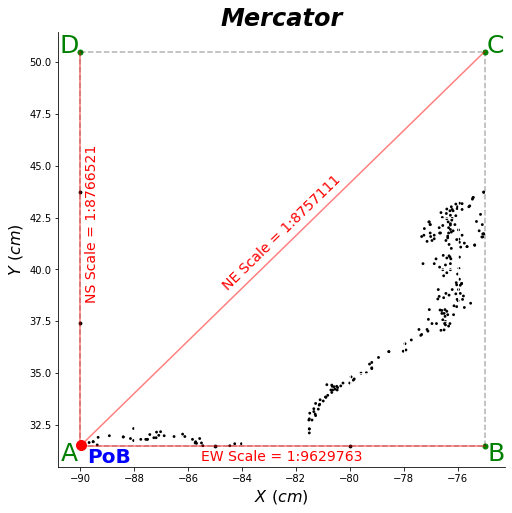

In [35]:
# Mercator Mapping Prescription
Xm_MCsqr = coords_M.iloc[0, 1] # PoB
Ym_MCsqr = coords_M.iloc[0, 0] # PoB

# Applying mapping prescription to points
xA,xB,xC,xD,yA,yB,yC,yD = prescribe(abcd_sph,MC)

# Defining the plot name
MCns = plt

# Resizing the plot window
MCns.rcParams["figure.figsize"] = (8,8)
MCns.rcParams['axes.spines.right'] = False
MCns.rcParams['axes.spines.top'] = False

# Plotting PoB
MCns.plot(Xm_MCsqr, Ym_MCsqr, 'ro', markersize=10, zorder=4)

# Applying Mercator transformation
coast_sqrM = mercator(coast_sqr)

# Plotting the coastlines
MCns.scatter(coast_sqrM['lambda'], coast_sqrM['psi'], c='k', s=8, edgecolors='none', zorder=1)

# Applying Mercator transformation
grid_sqrM = mercator(grid_sqr)

# Plotting the gridlines
MCns.scatter(grid_sqrM['lambda'], grid_sqrM['psi'], c='k', s=8, edgecolors='k', zorder=2)

# Plotting corner points
PCns.plot(xA, yA, 'go', markersize=5)
PCns.plot(xB, yB, 'go', markersize=5)
PCns.plot(xC, yC, 'go', markersize=5)
PCns.plot(xD, yD, 'go', markersize=5)

# Defining arrays for plotting gridlines
MxAB = np.arange(-90,-75,0.1)
MyAB = np.array([30] * 150)
MxBC = np.array([-75] * 150)
MyBC = np.arange(30,45,0.1)
MxCD = np.arange(-90,-75,0.1)
MyCD = np.array([45] * 150)
MxDA = np.array([-90] * 150)
MyDA = np.arange(30,45,0.1)
MxAC = np.arange(-90,-75,0.1)
MyAC = np.arange(30,45,0.1)

# Applying Mercator transformation to gridlines
MyAB2 = np.log(np.tan(((MyAB*rad)/2) + (math.pi/4))) * 180/math.pi
MyBC2 = np.log(np.tan(((MyBC*rad)/2) + (math.pi/4))) * 180/math.pi
MyCD2 = np.log(np.tan(((MyCD*rad)/2) + (math.pi/4))) * 180/math.pi
MyDA2 = np.log(np.tan(((MyDA*rad)/2) + (math.pi/4))) * 180/math.pi
MyAC2 = np.log(np.tan(((MyAC*rad)/2) + (math.pi/4))) * 180/math.pi

# Plotting gridlines
MCns.plot(MxAB,MyAB2,'k--', alpha=0.3)
MCns.plot(MxBC,MyBC2,'k--', alpha=0.3)
MCns.plot(MxCD,MyCD2,'k--', alpha=0.3)
MCns.plot(MxDA,MyDA2,'k--', alpha=0.3)

# Plotting Distance Lines
MCns.plot([xD,xA],[yD,yA],'r-', alpha=0.5)
MCns.plot([xB,xA],[yB,yA],'r-', alpha=0.5)
MCns.plot([xC,xA],[yC,yA],'r-', alpha=0.5)

# Plot title & Axis labels
MCns.xlabel('$X$ $(cm)$', fontsize='16', fontweight='bold')
MCns.ylabel('$Y$ $(cm)$', fontsize='16', fontweight='bold')
MCns.title('Mercator', fontsize='24', fontweight='bold', style='italic')

# Labels
MCns.text(Xm_MCsqr+0.2, Ym_MCsqr-0.85, 'PoB', fontsize=20, fontweight='bold', color='b')
MCns.text(xA-0.7, yA-0.7, 'A', fontsize=25, color='g')
MCns.text(xB+0.1, yB-0.7, 'B', fontsize=25, color='g')
MCns.text(xC+0.08, yC-0.05, 'C', fontsize=25, color='g')
MCns.text(xD-0.75, yD-0.05, 'D', fontsize=25, color='g')

# Scale Text Locations
MCns_AD_loc = np.array([((xA+xD)/2)+0.6, ((yA+yD)/2)-2.6])
MCns_AB_loc = np.array([((xA+xB)/2)-3, ((yA+yB)/2)-0.7])
MCns_AC_loc = np.array([((xA+xC)/2)-2, ((yA+yC)/2)-3])
 
# Scale text rotation angle
MCns_AD_theta = math.atan2(yD - yA, xD - xA) * deg
MCns_AB_theta = math.atan2(yB - yA, xB - xA) * deg
MCns_AC_theta = math.atan2(yC - yA, xC - xA) * deg
MCns_AD_rot = MCns.gca().transData.transform_angles(np.array((MCns_AD_theta,)),MCns_AD_loc.reshape((1, 2)))[0]
MCns_AB_rot = MCns.gca().transData.transform_angles(np.array((MCns_AB_theta,)),MCns_AB_loc.reshape((1, 2)))[0]
MCns_AC_rot = MCns.gca().transData.transform_angles(np.array((MCns_AC_theta,)),MCns_AC_loc.reshape((1, 2)))[0]

# Plotting scale text
MCns.text(MCns_AD_loc[0], MCns_AD_loc[1], 'NS Scale = ' + scaleMC['Scale'][2], fontsize=14, color='r', 
          rotation=MCns_AD_rot, rotation_mode='anchor')
MCns.text(MCns_AB_loc[0], MCns_AB_loc[1], 'EW Scale = ' + scaleMC['Scale'][0], fontsize=14, color='r', 
          rotation=MCns_AB_rot, rotation_mode='anchor')
MCns.text(MCns_AC_loc[0], MCns_AC_loc[1]+1, 'NE Scale = ' + scaleMC['Scale'][1], fontsize=14, color='r', 
          rotation=MCns_AC_rot, rotation_mode='anchor')

# Grid
MCns.grid(True, color='white', zorder=3)

## $\blacktriangleright$ ABCD: Transverse Plate Carree

###### Plotting ABCD: Transverse Plate Carree Map

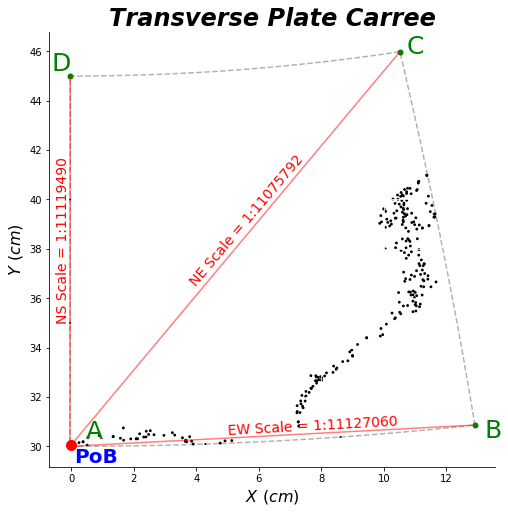

In [36]:
# Transverse Plate Carree Mapping Prescription
XmT_PCsqr = lmd_ddT # PoB
YmT_PCsqr = psi_ddT # PoB

# Applying mapping prescription to points
xAt,xBt,xCt,xDt,yAt,yBt,yCt,yDt = prescribe(abcdT,PCt)

# Defining the plot name
PCts = plt

# Resizing the plot window
PCts.rcParams["figure.figsize"] = (8,8)
PCts.rcParams['axes.spines.right'] = False
PCts.rcParams['axes.spines.top'] = False

# Plotting the original locations
PCts.plot(-YmT_PCsqr, XmT_PCsqr, 'ro', markersize=10, zorder=4)

# Plotting the coastlines
PCts.scatter(-coast_sqrT['psi'], coast_sqrT['lambda'], c='k', s=8, edgecolors='none', zorder=1)

# Plotting the gridline points
PCts.scatter(-grid_sqrT['psi'], grid_sqrT['lambda'], c='k', s=4, edgecolors='none', zorder=2)

# Plotting the gridlines
PCts.plot(-abcdBT['psi'], abcdBT['lambda'], 'k--', alpha=0.3)

# Plotting corner points 
PCts.plot(-abcdT['psi'], abcdT['lambda'], 'go', markersize=5)

# Plotting Distance Lines
PCts.plot([-yDt,-yAt],[xDt,xAt],'r-', alpha=0.5)
PCts.plot([-yBt,-yAt],[xBt,xAt],'r-', alpha=0.5)
PCts.plot([-yCt,-yAt],[xCt,xAt],'r-', alpha=0.5)

# Plot title & Axis labels
PCts.xlabel('$X$ $(cm)$', fontsize='16', fontweight='bold')
PCts.ylabel('$Y$ $(cm)$', fontsize='16', fontweight='bold')
PCts.title('Transverse Plate Carree', fontsize='24', fontweight='bold', style='italic')

# Labels
PCts.text(-YmT_PCsqr+0.1, XmT_PCsqr-0.7, 'PoB', fontsize=20, fontweight='bold', color='b')
PCts.text(-yAt+0.5, xAt+0.3, 'A', fontsize=25, color='g')
PCts.text(-yBt+0.3, xBt-0.5, 'B', fontsize=25, color='g')
PCts.text(-yCt+0.2, xCt-0.1, 'C', fontsize=25, color='g')
PCts.text(-yDt-0.6, xDt+0.2, 'D', fontsize=25, color='g')

# Scale Text Locations
PCts_AD_loc = np.array([((xA-xD)/2)-0.15, ((yA+yD)/2)-6])
PCts_AB_loc = np.array([((xB-xA)/2)-2.5, ((yA+yB)/2)-1])
PCts_AC_loc = np.array([((xC-xA)/2)-3.5, ((yA+yC)/2)-4.5])
 
# Scale text rotation angle
PCts_AD_theta = math.atan2(yD - yA, xD - xA) * deg
PCts_AB_theta = math.atan2(yB - yA, xB - xA) * deg + 4
PCts_AC_theta = math.atan2(yC - yA, xC - xA) * deg + 4.5
PCts_AD_rot = PCts.gca().transData.transform_angles(np.array((PCts_AD_theta,)),PCts_AD_loc.reshape((1, 2)))[0]
PCts_AB_rot = PCts.gca().transData.transform_angles(np.array((PCts_AB_theta,)),PCts_AB_loc.reshape((1, 2)))[0]
PCts_AC_rot = PCts.gca().transData.transform_angles(np.array((PCts_AC_theta,)),PCts_AC_loc.reshape((1, 2)))[0]

# Plotting scale text
PCts.text(PCts_AD_loc[0], PCts_AD_loc[1], 'NS Scale = ' + scalePCt['Scale'][2], fontsize=14, color='r', 
          rotation=PCts_AD_rot, rotation_mode='anchor')
PCts.text(PCts_AB_loc[0], PCts_AB_loc[1], 'EW Scale = ' + scalePCt['Scale'][0], fontsize=14, color='r', 
          rotation=PCts_AB_rot, rotation_mode='anchor')
PCts.text(PCts_AC_loc[0], PCts_AC_loc[1], 'NE Scale = ' + scalePCt['Scale'][1], fontsize=14, color='r', 
          rotation=PCts_AC_rot, rotation_mode='anchor')

# Grid
PCts.grid(True, color='white', zorder=3)

## $\blacktriangleright$ ABCD: Transverse Sanson-Flamsteed

###### Plotting ABCD: Transverse Sanson-Flamsteed Map

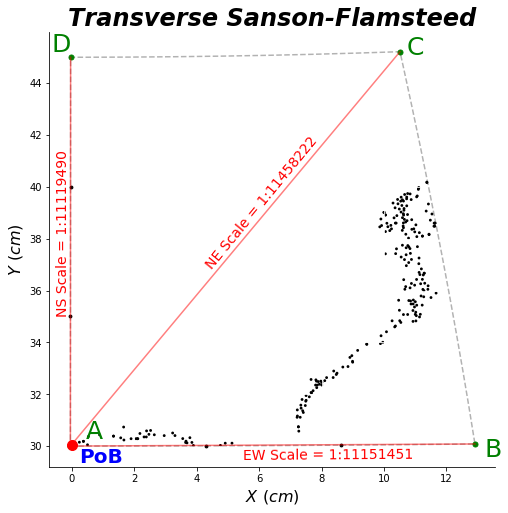

In [37]:
# Transverse Sanson-Flamsteed Mapping Prescription
XmT_SFsqr = lmd_ddT * np.cos(psi_ddT*rad) # PoB
YmT_SFsqr = psi_ddT # PoB

# Applying mapping prescription to points
xAt,xBt,xCt,xDt,yAt,yBt,yCt,yDt = prescribe(abcdT,SF)

# Defining the plot name
SFts = plt

# Resizing the plot window
SFts.rcParams["figure.figsize"] = (8,8)
SFts.rcParams['axes.spines.right'] = False
SFts.rcParams['axes.spines.top'] = False

# Plotting PoB
SFts.plot(-YmT_SFsqr, XmT_SFsqr, 'ro', markersize=10, zorder=4)

# Plotting the coastlines
SFts.scatter(-coast_sqrT['psi'], coast_sqrT['lambda']*np.cos(-coast_sqrT['psi']*rad), c='k', s=8, edgecolors='none', zorder=1)

# Plotting the gridline points
SFts.scatter(-grid_sqrT['psi'], grid_sqrT['lambda']*np.cos(-grid_sqrT['psi']*rad), c='k', s=8, edgecolors='k', zorder=2)

# Plotting the gridlines
SFts.plot(-abcdBT['psi'], abcdBT['lambda'] * np.cos(-abcdBT['psi']*rad), 'k--', alpha=0.3)

# Plotting corner points
SFts.plot(-abcdT['psi'], abcdT['lambda'] * np.cos(-abcdT['psi']*rad), 'go', markersize=5)

# Plotting Distance Lines
SFts.plot([-yDt,-yAt],[xDt,xAt],'r-', alpha=0.5)
SFts.plot([-yBt,-yAt],[xBt,xAt],'r-', alpha=0.5)
SFts.plot([-yCt,-yAt],[xCt,xAt],'r-', alpha=0.5)

# Plot title & Axis labels
SFts.xlabel('$X$ $(cm)$', fontsize='16', fontweight='bold')
SFts.ylabel('$Y$ $(cm)$', fontsize='16', fontweight='bold')
SFts.title('Transverse Sanson-Flamsteed', fontsize='24', fontweight='bold', style='italic')

# Labels
SFts.text(-YmT_SFsqr+0.25, XmT_SFsqr-0.7, 'PoB', fontsize=20, fontweight='bold', color='b')
SFts.text(-yAt+0.5, xAt+0.3, 'A', fontsize=25, color='g')
SFts.text(-yBt+0.3, xBt-0.5, 'B', fontsize=25, color='g')
SFts.text(-yCt+0.2, xCt-0.1, 'C', fontsize=25, color='g')
SFts.text(-yDt-0.6, xDt+0.2, 'D', fontsize=25, color='g')

# # Scale Text Locations
SFts_AD_loc = np.array([((xA-xD)/2)-0.15, ((yA+yD)/2)-6])
SFts_AB_loc = np.array([((xB-xA)/2)-2, ((yA+yB)/2)])
SFts_AC_loc = np.array([((xC-xA)/2)-3.5, ((yA+yC)/2)-4.5])
 
# Scale text rotation angle
SFts_AD_theta = math.atan2((yD - yA), xD - xA) * deg
SFts_AB_theta = math.atan2((yB - yA), xB - xA) * deg + 0.5
SFts_AC_theta = math.atan2((yC - yA), xC - xA) * deg + 4
SFts_AD_rot = SFts.gca().transData.transform_angles(np.array((SFts_AD_theta,)),SFts_AD_loc.reshape((1, 2)))[0]
SFts_AB_rot = SFts.gca().transData.transform_angles(np.array((SFts_AB_theta,)),SFts_AB_loc.reshape((1, 2)))[0]
SFts_AC_rot = SFts.gca().transData.transform_angles(np.array((SFts_AC_theta,)),SFts_AC_loc.reshape((1, 2)))[0]

# Plotting scale text
SFts.text(SFts_AD_loc[0], SFts_AD_loc[1], 'NS Scale = ' + scaleSFt['Scale'][2], fontsize=14, color='r', 
          rotation=SFts_AD_rot, rotation_mode='anchor')
SFts.text(SFts_AB_loc[0], SFts_AB_loc[1]-2, 'EW Scale = ' + scaleSFt['Scale'][0], fontsize=14, color='r', 
          rotation=SFts_AB_rot, rotation_mode='anchor')
SFts.text(SFts_AC_loc[0]+0.5, SFts_AC_loc[1]+0.3, 'NE Scale = ' + scaleSFt['Scale'][1], fontsize=14, color='r', 
          rotation=SFts_AC_rot, rotation_mode='anchor')

# Grid
SFts.grid(True, color='white', zorder=3)

## $\blacktriangleright$ ABCD: Transverse Mercator

###### Plotting ABCD: Transverse Mercator Map

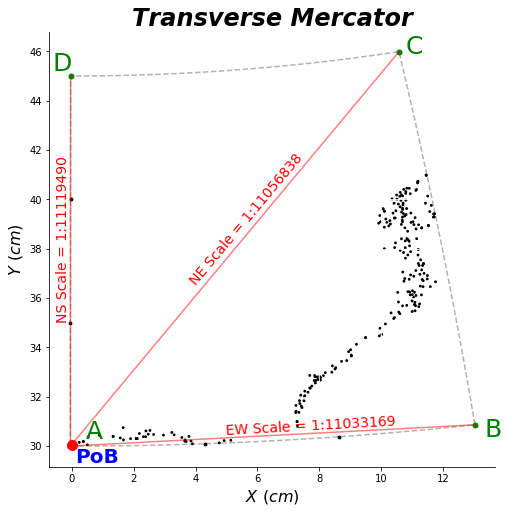

In [38]:
# Transverse Mercator Mapping Prescription
XmT_Msqr = coords_MT['lambda']
YmT_Msqr = coords_MT['psi']

# Applying mapping prescription to points
xAt,xBt,xCt,xDt,yAt,yBt,yCt,yDt = prescribe(abcdT,MC)

# Defining the plot name
MCts = plt

# Resizing the plot window
MCts.rcParams["figure.figsize"] = (8,8)
MCts.rcParams['axes.spines.right'] = False
MCts.rcParams['axes.spines.top'] = False

# Plotting PoB
MCts.plot(-YmT_Msqr, XmT_Msqr, 'ro', markersize=10, zorder=4)

# Applying Mercator transformation
coastT_Msqr = mercator(coast_sqrT)

# Plotting the coastlines
MCts.scatter(-coastT_Msqr['psi'], coastT_Msqr['lambda'], c='k', s=8, edgecolors='none', zorder=1)

# Applying Mercator transformation
gridT_Msqr = mercator(grid_sqrT)

# Plotting the gridlines
MCts.scatter(-gridT_Msqr['psi'], gridT_Msqr['lambda'], c='k', s=8, edgecolors='k', zorder=2)

# Applying Mercator transformation to gridlines
MCts.plot(-np.log(np.tan(((abcdBT['psi']*rad)/2) + (math.pi/4))) * deg, abcdBT['lambda'], 'k--', alpha=0.3)

# Applying Mercator transformation to corner points
MCts.plot(-np.log(np.tan(((abcdT['psi']*rad)/2) + (math.pi/4))) * deg, abcdT['lambda'], 'go', markersize=5)

# Plotting Distance Lines
MCts.plot([-yDt,-yAt],[xDt,xAt],'r-', alpha=0.5)
MCts.plot([-yBt,-yAt],[xBt,xAt],'r-', alpha=0.5)
MCts.plot([-yCt,-yAt],[xCt,xAt],'r-', alpha=0.5)

# Plot title & Axis labels
MCts.xlabel('$X$ $(cm)$', fontsize='16', fontweight='bold')
MCts.ylabel('$Y$ $(cm)$', fontsize='16', fontweight='bold')
MCts.title('Transverse Mercator', fontsize='24', fontweight='bold', style='italic')

# Labels
MCts.text(-YmT_Msqr+0.1, XmT_Msqr-0.7, 'PoB', fontsize=20, fontweight='bold', color='b')
MCts.text(-yAt+0.5, xAt+0.3, 'A', fontsize=25, color='g')
MCts.text(-yBt+0.3, xBt-0.5, 'B', fontsize=25, color='g')
MCts.text(-yCt+0.2, xCt-0.1, 'C', fontsize=25, color='g')
MCts.text(-yDt-0.6, xDt+0.2, 'D', fontsize=25, color='g')

# Scale Text Locations
MCts_AD_loc = np.array([((xA-xD)/2)-0.15, ((yA+yD)/2)-6])
MCts_AB_loc = np.array([((xB-xA)/2)-2.5, ((yA+yB)/2)-1])
MCts_AC_loc = np.array([((xC-xA)/2)-3.5, ((yA+yC)/2)-4.5])

# Scale text rotation angle
MCts_AD_theta = math.atan2((yD - yA), xD - xA) * deg
MCts_AB_theta = math.atan2((yB - yA), xB - xA) * deg + 4
MCts_AC_theta = math.atan2((yC - yA), xC - xA) * deg + 4.5
MCts_AD_rot = MCts.gca().transData.transform_angles(np.array((MCts_AD_theta,)),MCts_AD_loc.reshape((1, 2)))[0]
MCts_AB_rot = MCts.gca().transData.transform_angles(np.array((MCts_AB_theta,)),MCts_AB_loc.reshape((1, 2)))[0]
MCts_AC_rot = MCts.gca().transData.transform_angles(np.array((MCts_AC_theta,)),MCts_AC_loc.reshape((1, 2)))[0]

# Plotting scale text
MCts.text(MCts_AD_loc[0], MCts_AD_loc[1], 'NS Scale = ' + scaleMCt['Scale'][2], fontsize=14, color='r', 
          rotation=MCts_AD_rot, rotation_mode='anchor')
MCts.text(MCts_AB_loc[0], MCts_AB_loc[1], 'EW Scale = ' + scaleMCt['Scale'][0], fontsize=14, color='r', 
          rotation=MCts_AB_rot, rotation_mode='anchor')
MCts.text(MCts_AC_loc[0], MCts_AC_loc[1], 'NE Scale = ' + scaleMCt['Scale'][1], fontsize=14, color='r', 
          rotation=MCts_AC_rot, rotation_mode='anchor')

# Grid
MCts.grid(True, color='white', zorder=3)

______

# <span style="color:blue">*PART 5 - Tables*<span>

### $\blacktriangleright$  Normal Aspect

In [39]:
normAspect = pd.DataFrame({
    'direction':scalePC['Direction'],
    'scale_PC':scalePC['Scale'],
    '% PC':scalePC['Ratio to NS'],
    'scale_SF':scaleSF['Scale'],
    '% SF':scaleSF['Ratio to NS'],
    'scale_M':scaleMC['Scale'],
    '% M':scaleMC['Ratio to NS'],
})

### $\blacktriangleright$ Transverse Aspect

In [40]:
transAspect = pd.DataFrame({
    'direction':scalePCt['Direction'],
    'scale_PC':scalePCt['Scale'],
    '% PC':scalePCt['Ratio to NS'],
    'scale_SF':scaleSFt['Scale'],
    '% SF':scaleSFt['Ratio to NS'],
    'scale_M':scaleMCt['Scale'],
    '% M':scaleMCt['Ratio to NS'],
})

### $\blacktriangleright$ Tables

In [41]:
print()
print('Scales: Normal Aspect')
print()
print("-----------------------------------------------------------------------------------------------------")
print("   Direction       Scales PC       % PC       Scales SF       % SF        Scales M       % M         ")
print("-----------------------------------------------------------------------------------------------------")
for index, row in normAspect.iterrows():
    print("%8s %19s %12f %13s %12f %13s %13.8s" % 
          (row['direction'], row['scale_PC'], row['% PC'], row['scale_SF'], row['% SF'], row['scale_M'], row['% M']))
print("-----------------------------------------------------------------------------------------------------")
print()
print()
print()
print('Scales: Transverse Aspect')
print()
print("-----------------------------------------------------------------------------------------------------")
print("   Direction       Scales PC       % PC       Scales SF       % SF        Scales M       % M         ")
print("-----------------------------------------------------------------------------------------------------")
for index, row in transAspect.iterrows():
    print("%8s %19s %12f %13s %12f %13s %13.8s" % 
          (row['direction'], row['scale_PC'], row['% PC'], row['scale_SF'], row['% SF'], row['scale_M'], row['% M']))
print("-----------------------------------------------------------------------------------------------------")



Scales: Normal Aspect

-----------------------------------------------------------------------------------------------------
   Direction       Scales PC       % PC       Scales SF       % SF        Scales M       % M         
-----------------------------------------------------------------------------------------------------
      EW           1:9629763     0.866025    1:11119492     1.381732     1:9629763      1.098470
      NE          1:10001620     0.899467     1:7296708     0.906705     1:8757111      0.998926
      NS          1:11119492     1.000000     1:8047500     1.000000     1:8766521           1.0
-----------------------------------------------------------------------------------------------------



Scales: Transverse Aspect

-----------------------------------------------------------------------------------------------------
   Direction       Scales PC       % PC       Scales SF       % SF        Scales M       % M         
-------------------------------------------

______

# <span style="color:blue">*PART 6 - Discussion*<span>

### $\blacktriangleright$  Hypothesis

My initial hypothesis for the scale behavior in the transverse aspect was that it would make little difference for areas near the equator, while significantly improving the scale ratio for areas near the poles. This initial hypothesis was quickly disproved, but this was not surprising because, prior to this assignment, I had wrongly believed that the transverse aspect was exclusively treating the prime meridian as the new equator. Upon realizing my wrongful assumptions, I created a new hypothesis. My new hypothesis is that the scale will improve, but only slightly.

After completing the assignment, my new hypothesis seems to have also been incorrect. The scale improved dramatically with the transverse aspect. 

### $\blacktriangleright$ Evaluating the Scales

The transverse aspect scales are far more uniform than the normal aspect scales, but this is do to the mapping prescriptions we used. These mapping prescriptions are designed to provide the best scale ratios along the equator and these ratios gradually get worse as you move toward the poles. Since we made our PoB meridian the new equator, it makes sense that our scale ratio is so much better in the transverse aspect. When evaluating the scales in the normal aspect, it is clear that the Mercator mapping prescription provides the best scale ratios of the three prescriptions we are considering. For the transverse aspect, however, the differences in scale are so small that it is tough to say at first glance which one provides the best ratio. Since the normal Mercator mapping prescription is conformal, we know that the transverse is also conformal, so the Transverse Mercator is still the favored prescription. The Transverse Mercator seems to deviate the most in the NS direction, while both the Transverse Plate Carree and the Transverse Sanson-Flamsteed seem to deviate the most in the NE direction.  When evaluating the 15x15 degree maps I created, the Transverse Plate Carree and the Transverse Mercator look almost identical to the naked eye, so it is interesting to me that the scales deviate in different directions. 

As an engineer/surveyor, one thing I do not like about the transverse aspect scale behavior, and with the Transverse Mercator specifically, is that the map ABCD does not appear as a perfect square like it does in the normal aspect. In the transverse aspect, the square appears to be warped. This means that hand calculations and measurements are extremely difficult to record without the use of a computer. This difference is most likely due to my PoB be treated as the new equator. The Mercator mapping prescription is designed to have the latitudes go to infinity as they  approach a point 90 degrees from the equator. In the normal aspect case, that means the latitudes go to infinity as they approach the poles. Since the meridians converge at the poles, having it go to infinity there helps to maintain the "perfect square" appearance in the normal aspect. The transverse aspect of the Mercator mapping prescription operates in the same fashion, however, in the case of my PoB, the effects are different. Since I rotated the coordinate system to make the latitude of my PoB equal to zero, the point that is 90 degrees from the new equator is no longer the north pole. The meridians still converge at the poles, though, so this is why the appearance of my square ABCD seems to be warped. 